# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

In [106]:
!pip3 install tensorflow keras


In [107]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline


In [108]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))


In [109]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)


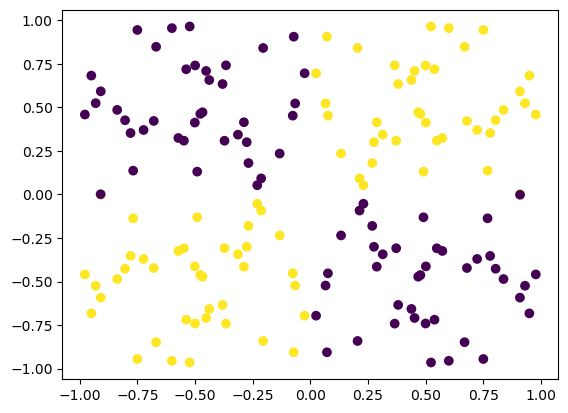

In [110]:
plt.scatter(*zip(*X), c=y)


In [111]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
# model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
print(model.predict(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)


Epoch 1/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.7230
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.7241
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.7257
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.7000
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.7026
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.6962
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.7031
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.7032
Epoch 9/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.6823
Epoch 10/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.6892
Epoch 11/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.6884
Epoch 12/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.6929
Epoch 13/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.6858
Epoch 14/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.6857
Epoch 15/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [112]:
print(model.predict(X).reshape(4*n))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
[0.8233326  0.7851529  0.92263514 0.8653396  0.6256814  0.93323207
 0.95154804 0.11636674 0.9513515  0.9139756  0.9199855  0.844564
 0.90962416 0.7090833  0.9445333  0.09083924 0.94833153 0.9073454
 0.8142549  0.2806965  0.8368649  0.91753924 0.9400358  0.92531407
 0.89312786 0.94804853 0.72254866 0.9285857  0.9330403  0.9536838
 0.33493754 0.85678095 0.9528151  0.95386803 0.8186072  0.8675493
 0.37036923 0.9530742  0.922545   0.9532871  0.83192205 0.77845234
 0.92731005 0.8588438  0.62358665 0.9369862  0.95046943 0.11587252
 0.9501259  0.91939145 0.9156539  0.83788073 0.91525567 0.7172676
 0.9468526  0.09070256 0.94649094 0.91319966 0.8077284  0.27745664
 0.8461813  0.913296   0.93709344 0.9212473  0.88769716 0.9497851
 0.7323817  0.9329294  0.9368886  0.954027   0.3328948  0.8497143
 0.95204973 0.95392585 0.8278697  0.8612857  0.37502685 0.953715
 0.91829675 0.95382434 0.5702121  0.04884041 0.0516821  0.05236302
 0.03698845 0.04138882 0.08631167

In [113]:
scores = model.evaluate(X, y)
scores, model.metrics_names


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.3153


(0.3172093629837036, ['loss'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


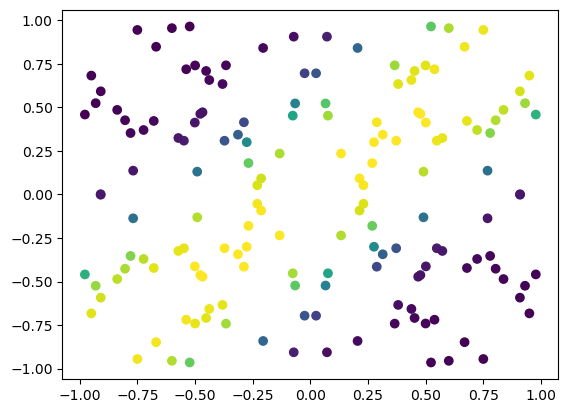

In [114]:
plt.scatter(*zip(*X), c=model.predict(X))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


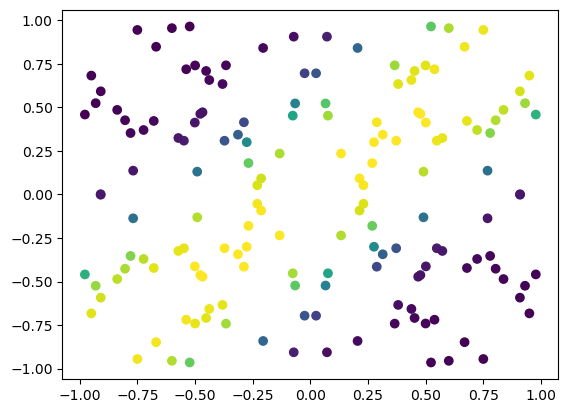

In [115]:
plt.scatter(*zip(*X), c=model.predict(X))


In [116]:
#Part 1 - Question #1 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Define loop
num_layers = [1,2,3,4,5]
scores_1 = []
for num_layer in num_layers:
    model = Sequential([
        Dense(2, input_dim=2, activation='tanh')
    ])
    if num_layer >= 1:
        model.add(Dense(2, activation='tanh')) 
    if num_layer >= 2:
        model.add(Dense(2, activation='tanh'))
    if num_layer >= 3:
        model.add(Dense(2, activation='tanh'))
    if num_layer >= 4:
        model.add(Dense(2, activation='tanh'))
    if num_layer == 5:
        model.add(Dense(2, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    #Define the model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(X, y, batch_size=1, epochs=400)
    
    #Model evaluation
    score_1 = model.evaluate(X, y)[1]
    scores_1.append(score_1)

#Print accuracy scores 
print(f"Accuracy scores: {scores_1}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.4953 - loss: 0.7003
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7357 - loss: 0.6128
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7318 - loss: 0.5245 
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8248 - loss: 0.4594
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8627 - loss: 0.3963
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7778 - loss: 0.4619 
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7743 - loss: 0.4589 
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8522 - loss: 0.3384
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8548 - loss: 0.3756
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.7903 - loss: 0.4982 
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8228 - loss: 0.3991
Epoch 12/400
16

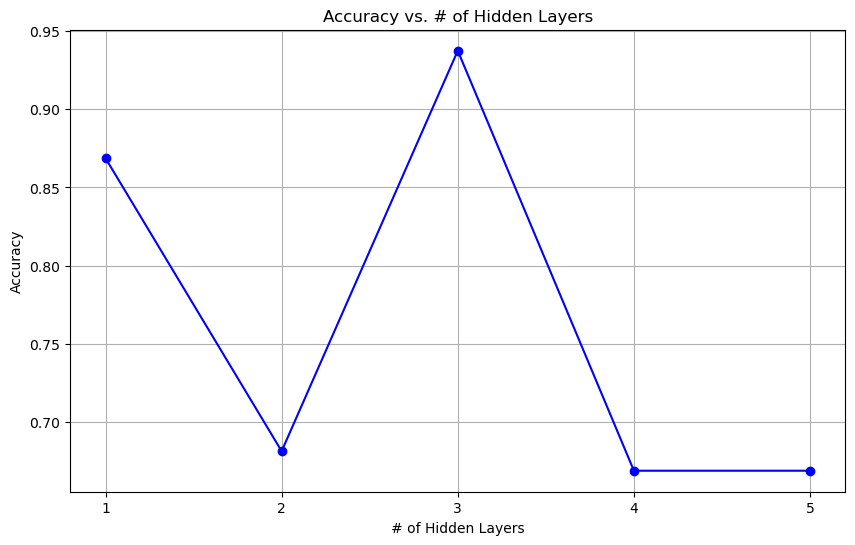

In [122]:
#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_layers, scores_1, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. # of Hidden Layers')
plt.xlabel('# of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(num_layers)
plt.grid(True)
plt.show()


In [123]:
print("""The optimal number of hidden layers for the first model would be 3, as that layer has the highest corresponding accuracy score @ 0.9375.""")

The optimal number of hidden layers for the first model would be 3, as that layer has the highest corresponding accuracy score @ 0.9375.


In [124]:
#Part 1 - Question #2

#Define loop
num_layers = [1,2,3,4,5]
scores_2 = []
for num_layer in num_layers:
    model = Sequential([
        Dense(2, input_dim=2, activation='tanh')
    ])
    if num_layer >= 1:
        model.add(Dense(3, activation='tanh'))
    if num_layer >= 2:
        model.add(Dense(3, activation='tanh'))
    if num_layer >= 3:
        model.add(Dense(3, activation='tanh'))
    if num_layer >= 4:
        model.add(Dense(3, activation='tanh'))
    if num_layer == 5:
        model.add(Dense(3, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    #Define the model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(X, y, batch_size=1, epochs=400)

    #Model evaluation
    score_2 = model.evaluate(X, y)[1]
    scores_2.append(score_2)

#Print accuracy scores
print(f"Accuracy scores: {scores_2}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5447 - loss: 0.6999
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6468 - loss: 0.6367 
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8898 - loss: 0.4988
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9292 - loss: 0.3328
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8591 - loss: 0.3477
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.9223 - loss: 0.2142
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8594 - loss: 0.2791
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8826 - loss: 0.2278
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9482 - loss: 0.1494
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9397 - loss: 0.1376
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9516 - loss: 0.1969
Epoch 12/400
160/1

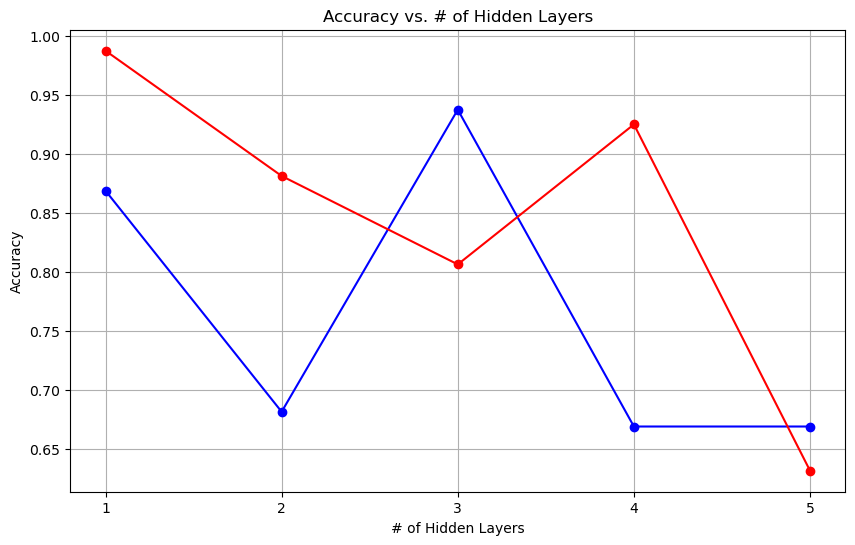

In [129]:
#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_layers, scores_1, marker='o', linestyle='-', color='b')
plt.plot(num_layers, scores_2, marker='o', linestyle='-', color='r', label='Model 2')
plt.title('Accuracy vs. # of Hidden Layers')
plt.xlabel('# of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(num_layers)
plt.grid(True)
plt.show()


In [126]:
print("""The optimal number of hidden layers for the second model would be 1, as that has the highest accuracy score @ 0.987500011920929.""")

The optimal number of hidden layers for the second model would be 1, as that has the highest accuracy score @ 0.987500011920929.


In [127]:
#Part 1 - Question #3 

#Define loop
num_layers = [1,2,3,4,5]
scores_3 = []
for num_layer in num_layers:
    model = Sequential([
        Dense(2, input_dim=2, activation='tanh')
    ])
    if num_layer >= 1:
        model.add(Dense(4, activation='tanh'))
    if num_layer >= 2:
        model.add(Dense(4, activation='tanh'))
    if num_layer >= 3:
        model.add(Dense(4, activation='tanh'))
    if num_layer >= 4:
        model.add(Dense(4, activation='tanh'))
    if num_layer == 5:
        model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    #Define the model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(X, y, batch_size=1, epochs=400)

    #Model evaluation
    score_3 = model.evaluate(X, y)[1]
    scores_3.append(score_3)

#Print accuracy scores
print(f"Accuracy scores: {scores_3}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5401 - loss: 0.7105
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5699 - loss: 0.6746
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7400 - loss: 0.5962
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7825 - loss: 0.4598
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9100 - loss: 0.3361
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9279 - loss: 0.2639
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9083 - loss: 0.1998
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9262 - loss: 0.1916
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9278 - loss: 0.1936
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9342 - loss: 0.1885
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8952 - loss: 0.2624
Epoch 12/400
160/16

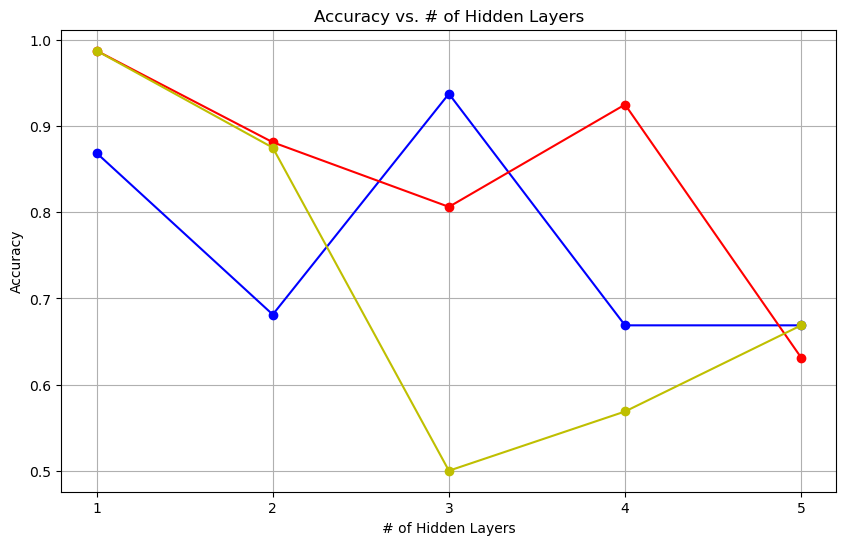

In [130]:
#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_layers, scores_1, marker='o', linestyle='-', color='b', label='Model 1')
plt.plot(num_layers, scores_2, marker='o', linestyle='-', color='r', label='Model 2')
plt.plot(num_layers, scores_3, marker='o', linestyle='-', color='y', label='Model 3')
plt.title('Accuracy vs. # of Hidden Layers')
plt.xlabel('# of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(num_layers)
plt.grid(True)
plt.show()

In [132]:
print("""The optimal number of hidden layers for the third model would be 1, as that has the highest accuracy score @ 0.987500011920929.""")

The optimal number of hidden layers for the third model would be 1, as that has the highest accuracy score @ 0.987500011920929.


In [133]:
#Part 1 - Question #4

###SOFTPLUS Activation###

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4  

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='softplus'))
model.add(Dense(neurons_per_hidden_layer, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.4205 - loss: 0.7391   
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.5769 - loss: 0.6903
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5215 - loss: 0.7001
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5911 - loss: 0.6808
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5765 - loss: 0.6735
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6048 - loss: 0.6428 
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5329 - loss: 0.6416 
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5998 - loss: 0.6137 
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7444 - loss: 0.5105
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7863 - loss: 0.5191 
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7763 - loss: 0.4804
Epoch 12/400

In [134]:
print("""Using the softplus activation function, we are able to observe a model with a fairly minimal loss function @ 0.017431840300559998""")

Using the softplus activation function, we are able to observe a model with a fairly minimal loss function @ 0.017431840300559998


In [135]:
#Part 1 - Question #4

###RELU Activation###

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='relu'))
model.add(Dense(neurons_per_hidden_layer, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.5743 - loss: 0.6561   
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8218 - loss: 0.4361
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9133 - loss: 0.2649
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8752 - loss: 0.3281
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9079 - loss: 0.2200
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9018 - loss: 0.1827 
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9145 - loss: 0.2693
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9051 - loss: 0.2070 
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9630 - loss: 0.1313
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9300 - loss: 0.2445 
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9049 - loss: 0.2410
Epoch 12/400


In [136]:
print("""Utilization of the relu activation function resulted in a model with minimal loss function @ 0.28042155504226685. This value is higher compared to the model containing the softplus activation function (0.017431840300559998).""")

Utilization of the relu activation function resulted in a model with minimal loss function @ 0.28042155504226685. This value is higher compared to the model containing the softplus activation function (0.017431840300559998).


In [137]:
#Part 1 - Question #4

###TANH Activation###

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4  

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='tanh'))
model.add(Dense(neurons_per_hidden_layer, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.4554 - loss: 0.7009   
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7473 - loss: 0.5622 
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8356 - loss: 0.3730 
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9062 - loss: 0.2941
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.9051 - loss: 0.2467
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8905 - loss: 0.2636
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9339 - loss: 0.1526
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.9147 - loss: 0.2007
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8697 - loss: 0.2340
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8746 - loss: 0.2198 
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9194 - loss: 0.1816
Epoch 12/400


In [139]:
print("""This particular model utilized the tanh activation function. The loss function for this particular model is 0.06121869012713432. This value is lower whenc compared to relu activation, but higher when compared to softplus activation""")

This particular model utilized the tanh activation function. The loss function for this particular model is 0.06121869012713432. This value is lower whenc compared to relu activation, but higher when compared to softplus activation


In [140]:
#Part 1 - Question #4

###SIGMOID Activation###

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4  

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='sigmoid'))
model.add(Dense(neurons_per_hidden_layer, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5095 - loss: 0.7087   
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5255 - loss: 0.7056
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.4597 - loss: 0.7189 
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5484 - loss: 0.6934
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5391 - loss: 0.6919 
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5181 - loss: 0.7046 
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5177 - loss: 0.7050
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5762 - loss: 0.6963
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4839 - loss: 0.7097
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5017 - loss: 0.7060
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4200 - loss: 0.7105
Epoch 12/400


In [141]:
print("""The utilization of the sigmoid activation function resulted in a model with mininmal loss function @ 0.03711051121354103. Overall, with regards to the loss function, it seems that softplus activation had the lowest loss value @ 0.017431840300559998, followed by sigmoid activation @ 0.03711051121354103, followed by tanh activation @ 0.06121869012713432, and finally followed by relu activation @ 0.28042155504226685. For question #5, I will utilize softplus activation.""")

The utilization of the sigmoid activation function resulted in a model with mininmal loss function @ 0.03711051121354103. Overall, with regards to the loss function, it seems that softplus activation had the lowest loss value @ 0.017431840300559998, followed by sigmoid activation @ 0.03711051121354103, followed by tanh activation @ 0.06121869012713432, and finally followed by relu activation @ 0.28042155504226685. For question #5, I will utilize softplus activation.


In [142]:
#Part 1 - Question #5
#I utilized the Adam optimizer for this model + softplus activation

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4  

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='softplus'))
model.add(Dense(neurons_per_hidden_layer, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Final loss: {loss}")
print(f"Final accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.5007 - loss: 0.7567    
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.4475 - loss: 0.7229
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5346 - loss: 0.6828
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7317 - loss: 0.5943 
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7149 - loss: 0.5625
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7644 - loss: 0.5169
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.6783 - loss: 0.5648
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.6911 - loss: 0.5472
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7725 - loss: 0.4635
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7146 - loss: 0.5149
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7273 - loss: 0.4816 
Epoch 12/400


In [145]:
print("""This particular model, which utilized the Adam optimizer + softplus activation, has a loss function of 7.971192836761475. The loss value actually increased with the utilization of the Adam optimizer.""")

This particular model, which utilized the Adam optimizer + softplus activation, has a loss function of 7.971192836761475. The loss value actually increased with the utilization of the Adam optimizer.


In [143]:
#Part 1 - Question #5
#I utliized the Adagrad optimizer for this model + softplus activation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

#Define optimal parameters
num_layers = 1
neurons_per_hidden_layer = 4  

#Define the model + compile + fit
model = Sequential()
model.add(Dense(neurons_per_hidden_layer, input_dim=2, activation='softplus'))
model.add(Dense(neurons_per_hidden_layer, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))
adagrad = Adagrad(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model.fit(X, y, batch_size=1, epochs=400)

#Model evaluation
loss, accuracy = model.evaluate(X, y)

#Print model metrics
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.4576 - loss: 0.7254
Epoch 2/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.5713 - loss: 0.6893 
Epoch 3/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5675 - loss: 0.6826
Epoch 4/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6516 - loss: 0.6650 
Epoch 5/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6165 - loss: 0.6187
Epoch 6/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8832 - loss: 0.5355
Epoch 7/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8474 - loss: 0.4725
Epoch 8/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8590 - loss: 0.3895
Epoch 9/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.8897 - loss: 0.3205
Epoch 10/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9031 - loss: 0.2758
Epoch 11/400
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.8840 - loss: 0.2645
Epoch 12/400
160/

In [147]:
print("""Utilization of the Adagrad optimzer + softplus activation brought down the loss function to 0.0366697758436203, which is an improvement over the previous loss function associated with the Adam optimizer model (Adam optimizer - loss value @ 7.971192836761475)""")

Utilization of the Adagrad optimzer + softplus activation brought down the loss function to 0.0366697758436203, which is an improvement over the previous loss function associated with the Adam optimizer model (Adam optimizer - loss value @ 7.971192836761475)


## Part 2 - BYOD (Bring your own Dataset)

Using your own dataset, experiment and find the best Neural Network configuration. You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [148]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

stars = pd.read_csv('C:\\Users\\Michael\\Desktop\\MLData\\stars.csv')
stars.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [149]:
stars_Color = stars['Color'].unique()
stars_Color


array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [150]:
stars_Spectral_Class = stars['Spectral_Class'].unique()
stars_Spectral_Class


array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [151]:
stars_Type = stars['Type'].unique()
stars_Type


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [152]:
#Define columns/variables to transform
cvariables = ['Color', 'Spectral_Class']

#Use OneHotEncoder to transform the categorical categories that are a part of cvariables ('Color' and 'Spectral_Class')
OH = OneHotEncoder(handle_unknown="ignore", sparse=False)
OHcategory = OH.fit_transform(stars[cvariables])

#Create dataframe that contain the transformed categorical values & concatenate it with the original stars df/drop non-transformed values
Tcategories = OH.get_feature_names_out(cvariables)
StarsTcategories = pd.DataFrame(OHcategory, columns=Tcategories)
Tstars = pd.concat([stars.drop(cvariables, axis=1), StarsTcategories], axis=1)
Tstars


,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
from tensorflow.keras.utils import to_categorical

#Define X and Y
X = Tstars.drop('Type', axis=1)
Y = Tstars['Type']

#Encode Y using tensorflow.keras.utils
Y_stars = to_categorical(Y, num_classes=6)
Y_stars


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#Model 1/Attempt 1

#Split data into train/test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y_stars, test_size=0.2)

#Define model + compiles + fit
model = Sequential()
model.add(Dense(16, input_dim=28, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(6, activation='softmax')) 
adam = Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, Ytrain, epochs=1000, batch_size=10)

#Model evaluation
loss, accuracy = model.evaluate(Xtest, Ytest)

#Print evaluation
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/1000


C:\Users\Michael\anaconda3\InstallationMain\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.0936 - loss: 1.8849    
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.2124 - loss: 1.6484
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.3114 - loss: 1.4693
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.3512 - loss: 1.3754
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3048 - loss: 1.3997
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.3907 - loss: 1.2859
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.3542 - loss: 1.3196
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.3293 - loss: 1.2913
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3460 - loss: 1.2296
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3899 - loss: 1.2482
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.3745 - loss: 1.2146
Epoch 12/1000
20/20 ━━━━━━━━━━━━━━━━━━━

In [157]:
print("""This particular model had an accuracy of roughly 25%, with a loss of 1.301504135131836. I utilized the Adam optimizer for this model and utilized softmax for the activation function associated with the output layer (in order to accomodate multi-class classification). The hidden neuron layers were associated with the Tanh activation function.""")

This particular model had an accuracy of roughly 25%, with a loss of 1.301504135131836. I utilized the Adam optimizer for this model and utilized softmax for the activation function associated with the output layer (in order to accomodate multi-class classification). The hidden neuron layers were associated with the Tanh activation function.


In [158]:
from keras.models import Sequential
from keras.layers import Dense

#Model 1/Attempt 2

#Split data into train/test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y_stars, test_size=0.2)

#Define model + compiles + fit
model = Sequential()
model.add(Dense(16, input_dim=28, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))
adam = Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, Ytrain, epochs=1000, batch_size=10)

#Model evaluation
loss, accuracy = model.evaluate(Xtest, Ytest)

#Print evaluation
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.1857 - loss: 5748.5591 
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.1861 - loss: 2939.8323
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.1711 - loss: 2223.9612  
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.0975 - loss: 636.8438  
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.2966 - loss: 224.9568
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3234 - loss: 83.2017
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4250 - loss: 69.0094
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.3872 - loss: 38.7431
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3788 - loss: 31.8035
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.4420 - loss: 21.7752
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.4212 - loss: 19.7055
Epoch 

In [159]:
print("""For this model, I went ahead and added an additional hidden layer, consisting of 16 hidden neurons. Additionally, I changed the activation function from tanh to relu. This model had an accuracy of approximately 75% and a loss of 0.4815387427806854""")

For this model, I went ahead and added an additional hidden layer, consisting of 16 hidden neurons. Additionally, I changed the activation function from tanh to relu. This model had an accuracy of approximately 75% and a loss of 0.4815387427806854


In [167]:
from keras.models import Sequential
from keras.layers import Dense

#Model 3/Attempt 3

#Split data into train/test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y_stars, test_size=0.2)

#Define model + compiles + fit
model = Sequential()
model.add(Dense(16, input_dim=28, activation='softplus'))
model.add(Dense(16, activation='softplus'))
model.add(Dense(6, activation='softmax')) 
adam = Adam(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, Ytrain, epochs=1000, batch_size=10)

#Model evaluation
loss, accuracy = model.evaluate(Xtest, Ytest)

#Print evaluation
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.1243 - loss: 15051.5420 
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.1542 - loss: 7096.4336
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3142 - loss: 2590.5034
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.2521 - loss: 1574.9565
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.2626 - loss: 1939.1041
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.2871 - loss: 2434.8018
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3499 - loss: 964.7509
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3409 - loss: 608.4494
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5073 - loss: 895.4412
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3829 - loss: 606.7286
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.3608 - loss: 386.2822


In [168]:
print("""For this model, I actually trimmed the number hidden neuron layers to just one (consisting of 16 neurons) + I changed the activation function to softplus to see what kind of impact it had on accuracy and loss. Overall, I am pretty pleased with how this model turned out. The accuracy of the model is 95.83% and the loss function is @ 0.1138666570186615.""")

For this model, I actually trimmed the number hidden neuron layers to just one (consisting of 16 neurons) + I changed the activation function to softplus to see what kind of impact it had on accuracy and loss. Overall, I am pretty pleased with how this model turned out. The accuracy of the model is 95.83% and the loss function is @ 0.1138666570186615.


In [78]:
print("""Overall, I would say that the third model is the strongest of the three fielded in terms of accuracy and loss.""")


Overall, I would say that the third model is the strongest of the three fielded in terms of accuracy and loss.
